In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing  
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from pandas import DataFrame
import gmplot

In [2]:
x = pd.read_csv('data_cleaned_avg_cluster2.csv')
x = x.drop(['date', 'Address',], axis=1)

X_after, test = train_test_split(x, test_size=0.2, random_state=42)
# test.to_csv(r'data_test_daily_c.csv', index = False, header=True)

X_after, test_daily = train_test_split(X_after, test_size=0.125, random_state=42)
# test.to_csv(r'data_test_final_c.csv', index = False, header=True)

colors = 10*[
    'green', 'red', 'cyan', 'blue', 'black', 'yellow', 'magenta'
]

In [3]:
class K_Means:
    def __init__(self, tol=0.001, max_iter=300):
        self.tol = tol
        self.max_iter = max_iter

    def fit(self, data, k):

        self.centroids = {}

        for i in range(k):
            self.centroids[i] = data[i]

        for i in range(self.max_iter):

            self.classifications = {}

            for i in range(k):
                self.classifications[i] = []

            for featureset in data:
                distances = [
                    np.linalg.norm(
                        featureset-self.centroids[centroid]
                    ) 
                        for centroid in self.centroids
                    ]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)

            prev_centroids = dict(self.centroids)

            for classification in self.classifications:
                self.centroids[classification] = np.average(
                    self.classifications[classification], axis=0
                )
            optimized = True

            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
                    optimized = False

            if optimized:
                break

    def predict(self, data):
        distances = [
            np.linalg.norm(
                data-self.centroids[centroid]
            ) for centroid in self.centroids
        ]

        classification = distances.index(min(distances))

        return classification

In [4]:
x2 = X_after[['Latitude','Longitude', 'SO2']].copy()
x2.head()

,Latitude,Longitude,SO2
23066,37.544962,127.136792,0.003333
3263,37.487355,126.927102,0.003583
24329,37.480917,126.971481,0.004000
3190,37.540033,127.004850,0.003000
9665,37.452357,126.908296,0.005429


In [5]:
x_array = np.array(x2)
len(x_array)

18594

In [10]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(i)
    kmeans.fit(x_array)
    wcss_iteration = kmeans.inertia_
    wcss.append(wcss_iteration)

In [11]:
wcss

[168.69896419245217,
 76.16556651308127,
 50.513984039873364,
 35.199284406353236,
 25.94167453904532,
 19.402566218057686,
 16.901387498514996,
 13.137399725107006,
 10.470297662023416,
 8.860756132319803]

<function matplotlib.pyplot.show(*args, **kw)>

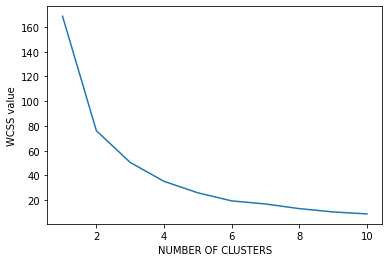

In [12]:
number_of_clusters = range(1,11)
plt.plot(number_of_clusters,wcss)
plt.xlabel('NUMBER OF CLUSTERS')
plt.ylabel('WCSS value')
plt.show

In [13]:
clf = K_Means()
clf.fit(x_array, 2)

In [ ]:
list_class = []
for centroid in clf.centroids:
    plt.scatter(
        clf.centroids[centroid][0], clf.centroids[centroid][1],
        marker='o', color='k', s=150, linewidths=5
    )
for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(
            featureset[0], featureset[1],
            marker='x', color=color, s=150, linewidths=1
        )
        list_class.append(classification)
plt.show()

In [ ]:
%matplotlib inline
fig = plt.figure()
ax = Axes3D(fig)

list_class = []
for centroid in clf.centroids:
    ax.scatter(
        clf.centroids[centroid][0], clf.centroids[centroid][1], clf.centroids[centroid][2],
        marker='o', color='k', s=150, linewidths=5
    )
for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        ax.scatter(
            featureset[0], featureset[1], featureset[2],
            marker='x', color=color, s=150, linewidths=1
        )
        list_class.append(classification)
plt.show()

In [ ]:
listlong = []
listlat = []

df = DataFrame(X_after, columns= ['Longitude', 'Latitude'])
products_list = df.values.tolist()

for i in products_list:
    if i[0] not in listlong: 
        listlong.append(i[0])
    if i[1] not in listlat: 
        listlat.append(i[1])